In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
sns.set()

In [2]:
data=pd.read_csv("players_20.csv")

In [3]:
#for displaying all rows and columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

<AxesSubplot:xlabel='value_eur', ylabel='passing'>

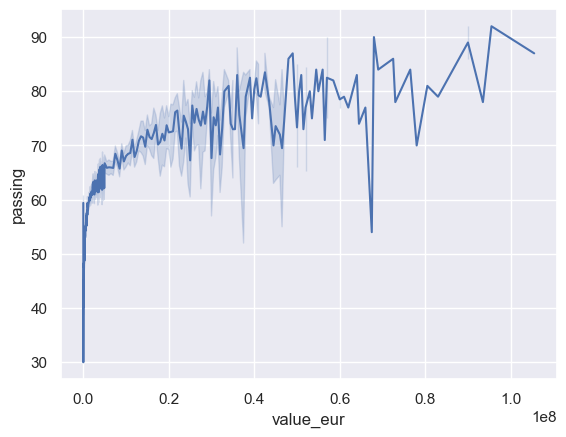

In [5]:
sns.lineplot(x="value_eur",y="passing",data=data)

E:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='value_eur', ylabel='Count'>

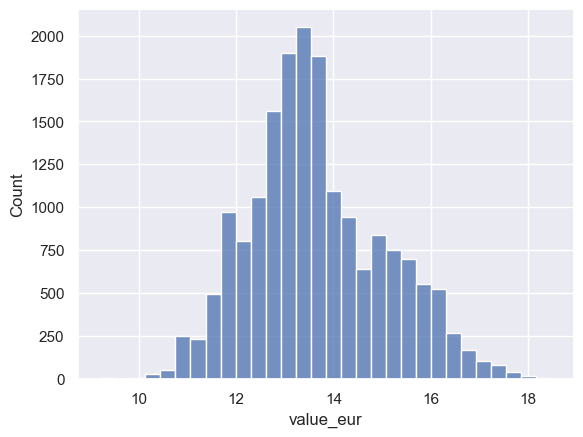

In [6]:
sns.histplot(np.log(data.value_eur),bins=30)

<AxesSubplot:xlabel='value_eur', ylabel='Count'>

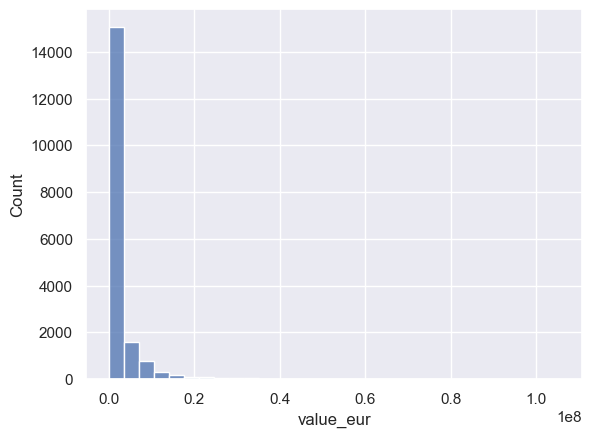

In [7]:
sns.histplot((data.value_eur),bins=30)

E:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='value_eur'>

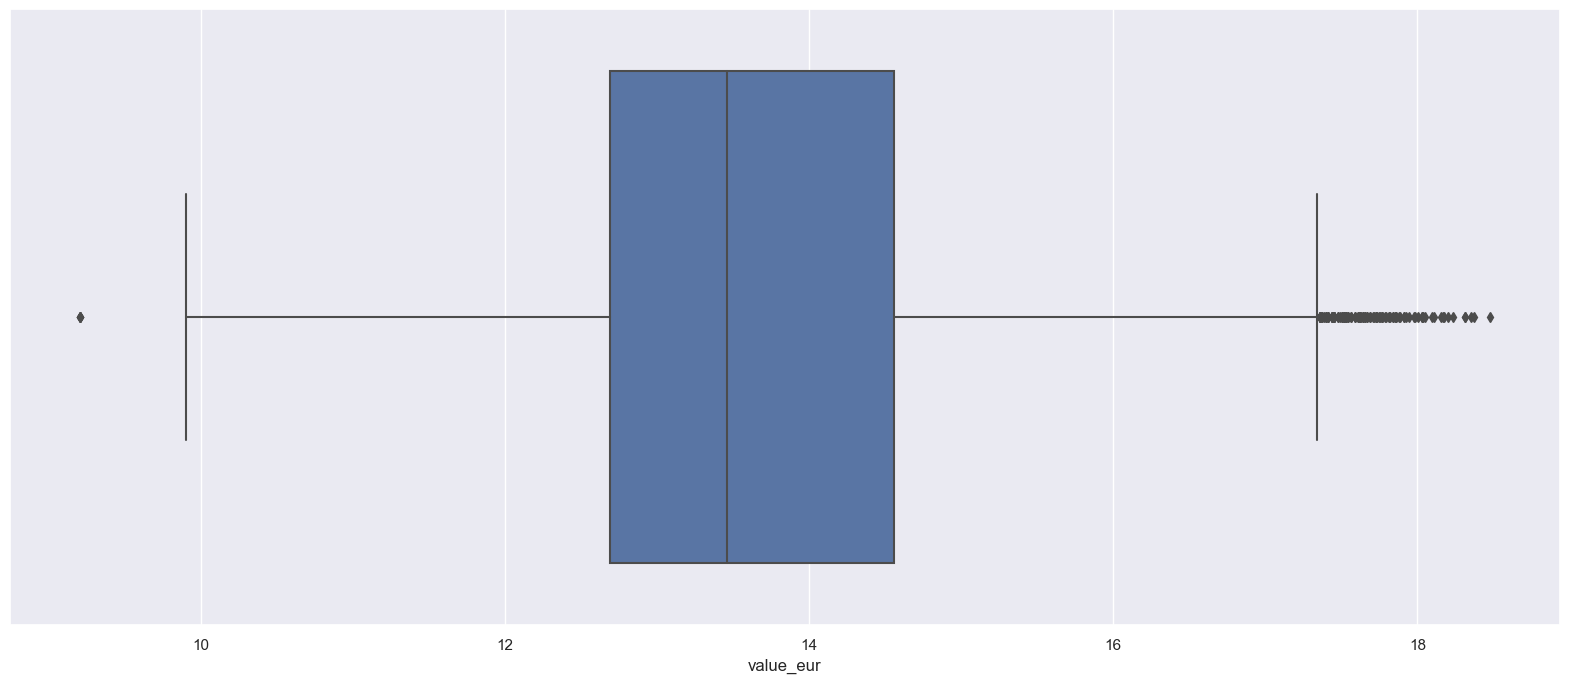

In [8]:
fig, ax = plt.subplots(1, figsize=(20, 8))
sns.boxplot(x=np.log(data['value_eur']))

<AxesSubplot:xlabel='value_eur'>

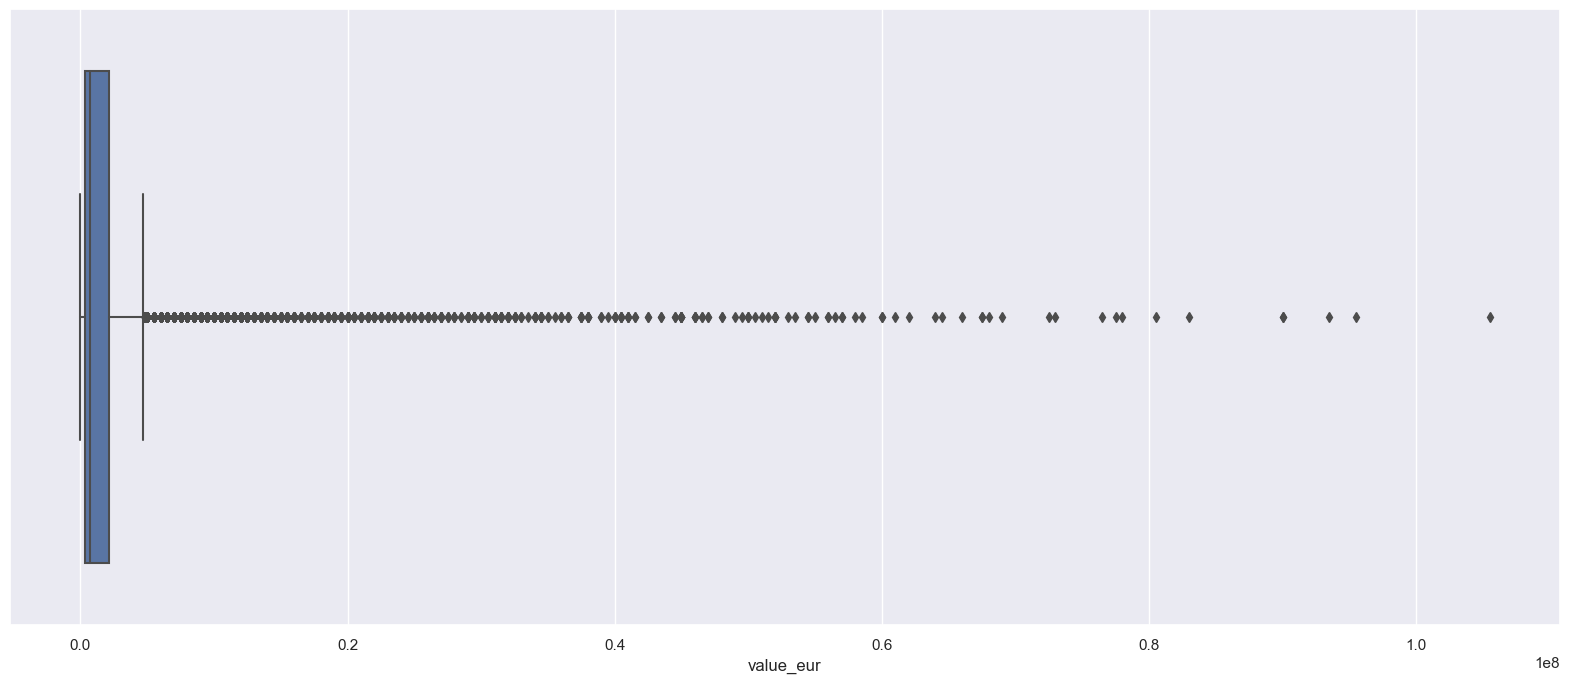

In [9]:
fig, ax = plt.subplots(1, figsize=(20, 8))
sns.boxplot(x=(data['value_eur']))

In [11]:
data.corr()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.736680,-0.093464,-0.203620,-0.445061,0.042015,-0.159848,-0.228084,-0.360765,-0.092250,-0.079645,-0.143372,0.178376,0.144401,0.103580,0.162112,-0.274248,-0.367527,-0.222207,-0.225230,-0.370582,-0.395903,-0.414772,-0.350622,-0.378179,-0.346197,-0.478916,-0.137097,-0.098612,-0.120116,-0.146427,-0.166148,-0.045166,-0.172646,-0.200029,-0.199998,-0.110933,0.119183,0.117895,-0.032759,-0.439012,0.040989,-0.283919,-0.189141,-0.077519,-0.279780,-0.178362,-0.232305,-0.164695,-0.102409,-0.229932,-0.147125,-0.385061,-0.131479,-0.087414,-0.068464,-0.113073,-0.116270,-0.114658,-0.123064,-0.113487
age,-0.736680,1.000000,0.081391,0.237169,0.464305,-0.262872,0.081513,0.151031,0.259582,0.073988,0.045277,0.065748,-0.225014,-0.122691,-0.119590,-0.201211,0.238990,0.330507,0.161913,0.259990,0.435292,0.429622,0.466477,0.404785,0.418794,0.338096,0.550246,0.128189,0.078531,0.149946,0.135681,0.143063,0.016735,0.141891,0.190419,0.184008,0.088359,-0.153145,-0.144310,-0.023131,0.463331,-0.089609,0.261916,0.185964,0.115859,0.341852,0.161616,0.260420,0.196346,0.086503,0.195372,0.141375,0.370149,0.157007,0.116857,0.101534,0.110313,0.112929,0.112615,0.121381,0.111811
height_cm,-0.093464,0.081391,1.000000,0.768816,0.039945,-0.002432,0.009527,0.019547,0.037935,-0.175200,-0.429980,0.010941,-0.032257,-0.013972,-0.096292,-0.432158,-0.203716,-0.290623,-0.413370,0.216422,0.490354,0.142825,0.152043,0.081560,0.134570,-0.018340,0.151743,-0.498103,-0.376091,0.010296,-0.371445,-0.351059,-0.500107,-0.447578,-0.410071,-0.335343,-0.425013,-0.558354,-0.474736,-0.633770,-0.019698,-0.789806,-0.174280,-0.041149,-0.291791,0.535400,-0.384213,-0.045307,-0.053148,-0.445302,-0.371546,-0.335786,-0.159296,-0.077038,-0.068334,-0.076953,0.367433,0.367163,0.364992,0.367097,0.367375
weight_kg,-0.203620,0.237169,0.768816,1.000000,0.156522,-0.011738,0.051782,0.065946,0.090854,-0.128568,-0.352060,0.048097,-0.081534,-0.027106,-0.092677,-0.387138,-0.095442,-0.182688,-0.300792,0.218564,0.581971,0.254839,0.269460,0.213008,0.244762,0.078373,0.287172,-0.401643,-0.291504,0.039679,-0.291090,-0.260903,-0.415861,-0.349230,-0.310277,-0.259906,-0.340154,-0.493125,-0.420978,-0.545514,0.090986,-0.669125,-0.055855,0.031246,-0.219505,0.614334,-0.279097,0.030643,-0.028345,-0.355329,-0.280242,-0.246309,-0.054167,-0.049683,-0.052770,-0.064492,0.342329,0.343211,0.339805,0.344397,0.343126
overall,-0.445061,0.464305,0.039945,0.156522,1.000000,0.646650,0.638230,0.573578,0.475557,0.230276,0.401261,0.631286,-0.192031,0.154458,-0.103241,0.158866,0.497881,0.683954,0.601190,0.334792,0.517214,0.948912,0.925025,0.790903,0.947823,0.480652,0.944758,0.389078,0.342372,0.345784,0.503157,0.394152,0.370639,0.415521,0.389790,0.487289,0.457052,0.186320,0.199009,0.253464,0.864526,0.103872,0.567504,0.267553,0.370344,0.361543,0.425081,0.399434,0.315582,0.356025,0.509251,0.347950,0.719992,0.303075,0.249891,0.219560,-0.013239,-0.013716,-0.017393,-0.006408,-0.012775
potential,0.042015,-0.262872,-0.002432,-0.011738,0.646650,1.000000,0.580868,0.475490,0.3

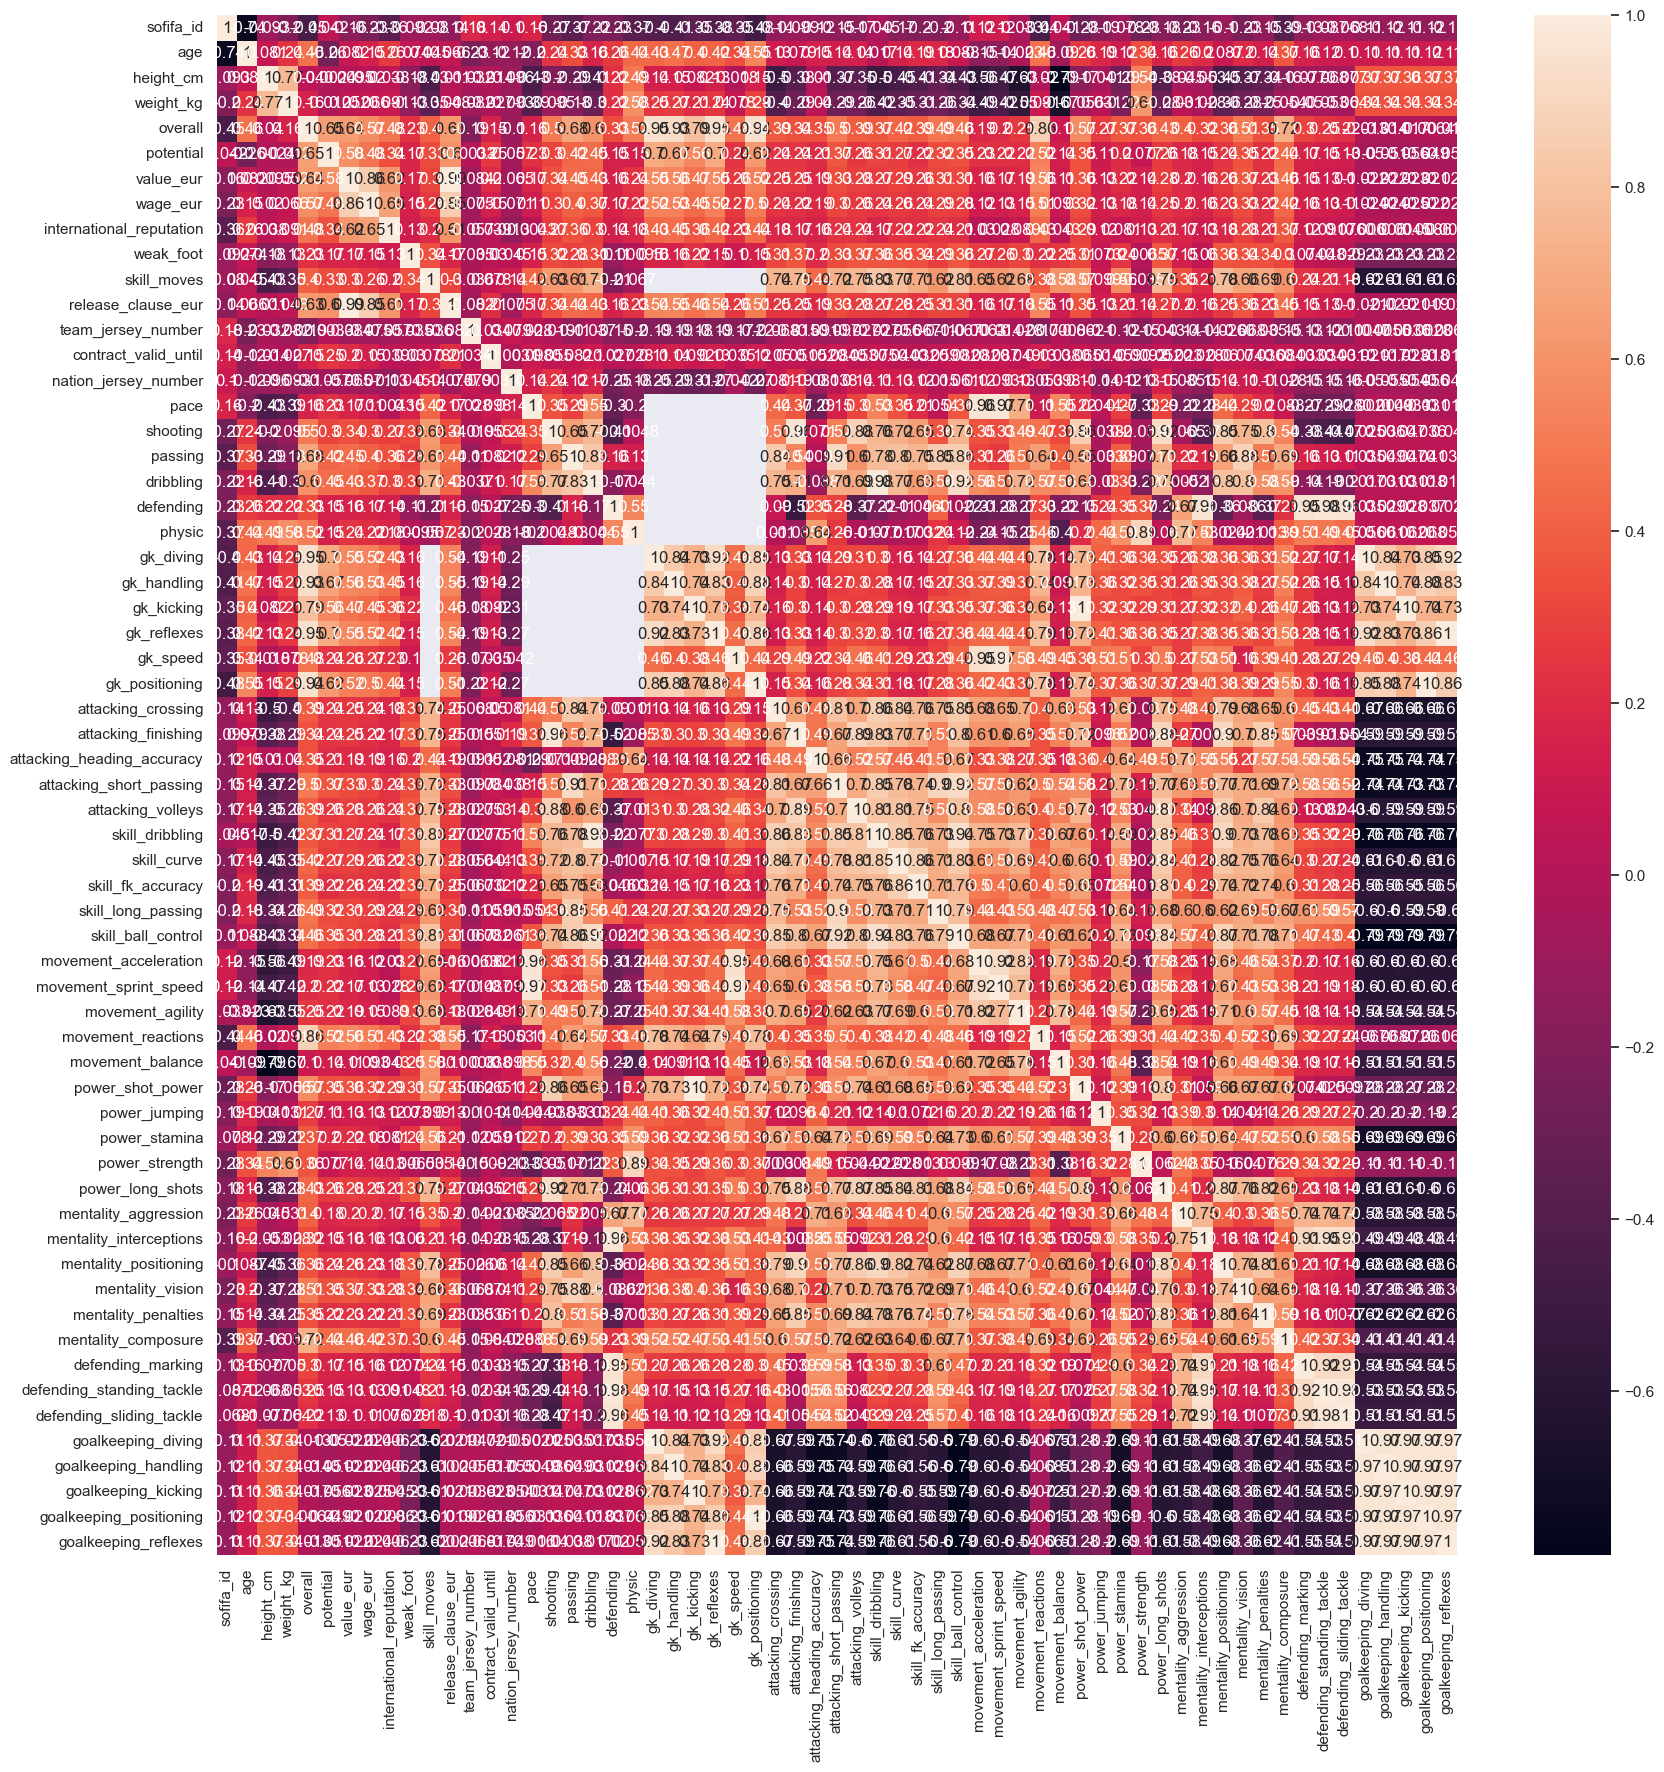

In [12]:
fig, ax = plt.subplots(1, figsize=(20, 20))

samp= data[["potential" ,"international_reputation" ,"weak_foot", "team_position", "shooting", "passing", "dribbling", "age", "height_cm"]]


a=sns.heatmap(data.corr(),annot=True)

In [13]:
samp= data[["potential" ,"international_reputation" ,"weak_foot", "team_position", "shooting", "passing", "dribbling", "age", "height_cm"]]
samp.head()

,potential,international_reputation,weak_foot,team_position,shooting,passing,dribbling,age,height_cm
0,94,5,4,RW,92.0,92.0,96.0,32,170
1,93,5,4,LW,93.0,82.0,89.0,34,187
2,92,5,5,CAM,85.0,87.0,95.0,27,175
3,93,3,3,GK,NaN,NaN,NaN,26,188
4,91,4,4,LW,83.0,86.0,94.0,28,175


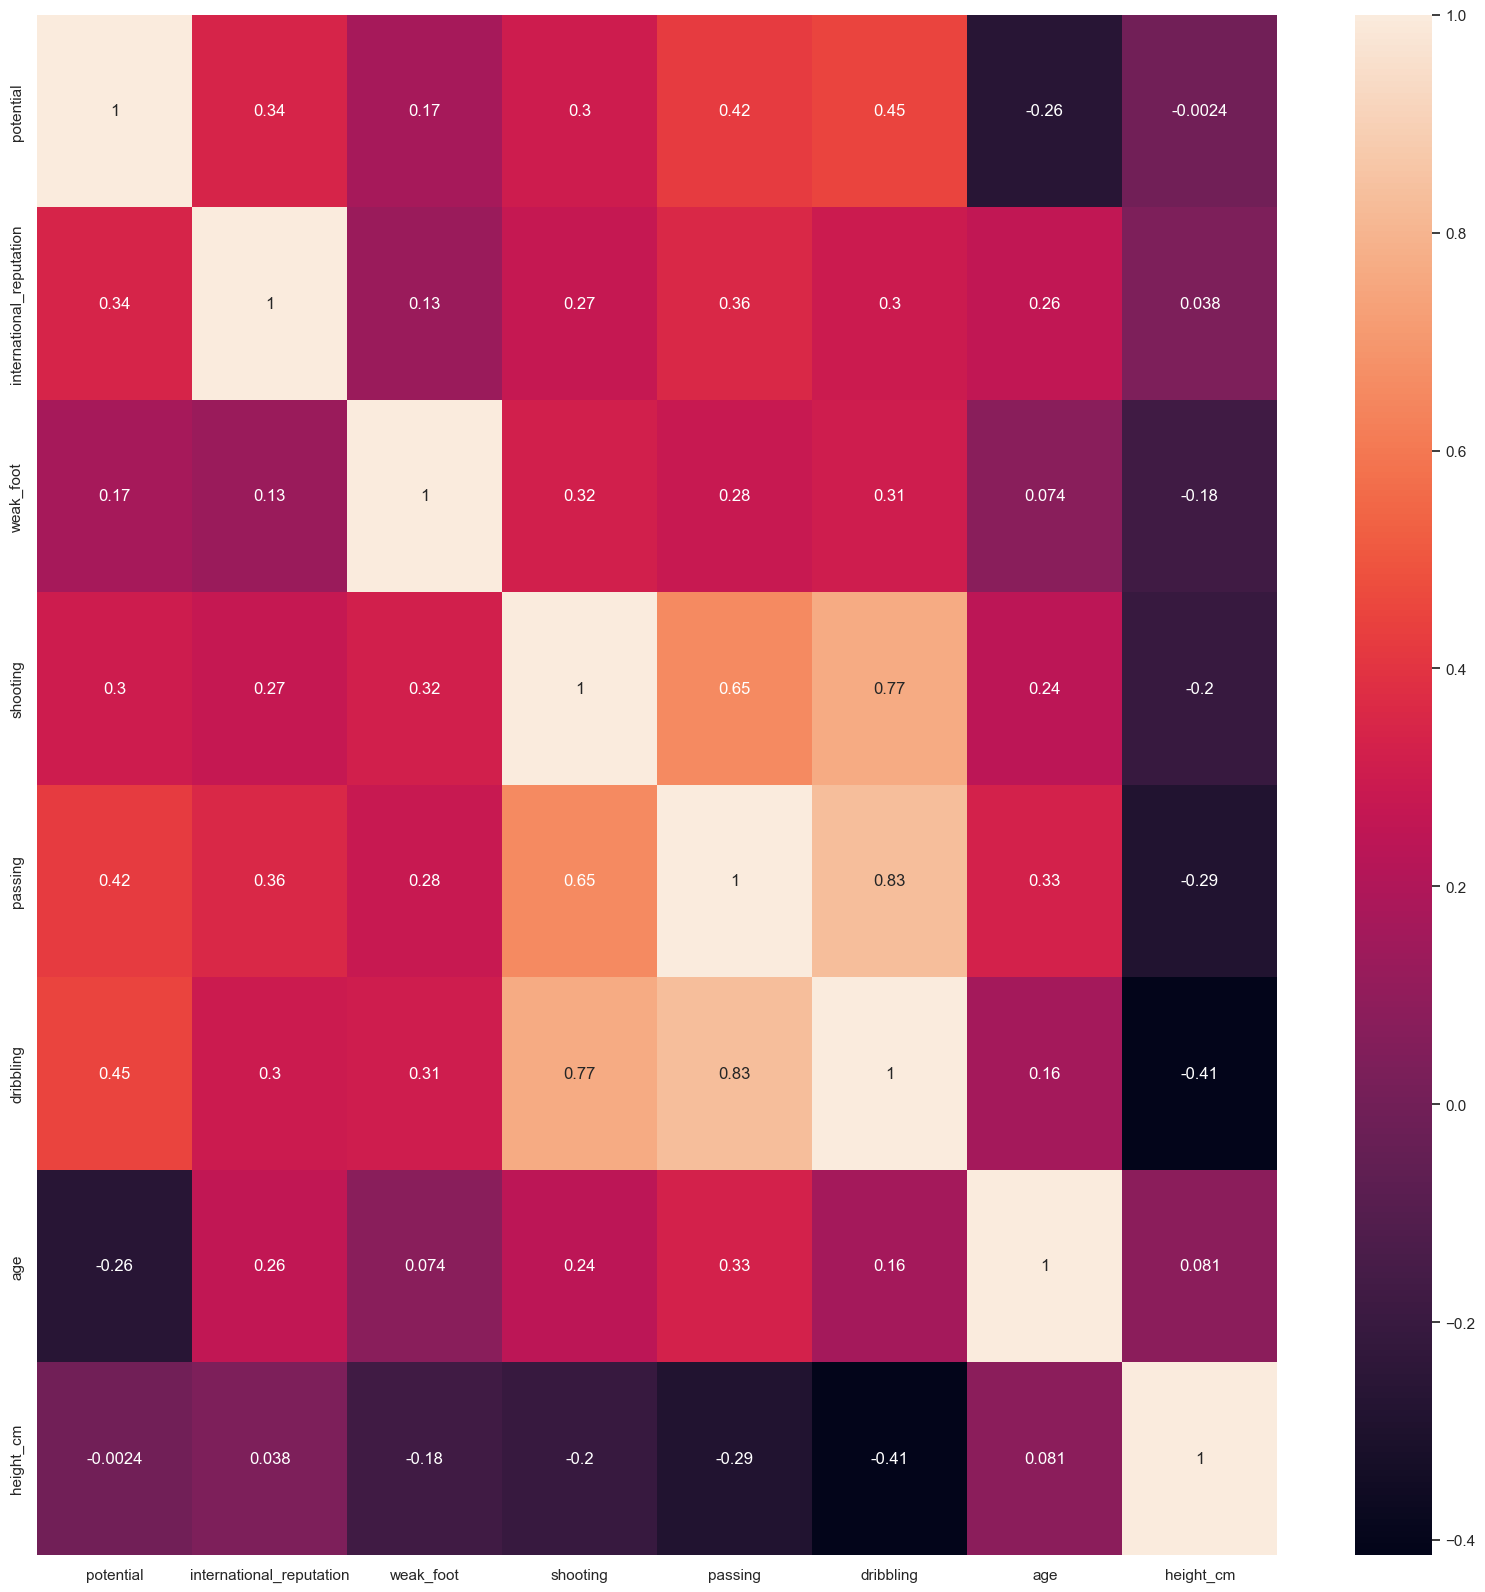

In [14]:
fig, ax = plt.subplots(1, figsize=(20, 20))
a=sns.heatmap(samp.corr(),annot=True)

In [15]:
type(samp)

pandas.core.frame.DataFrame

In [16]:
value_corr=data[["potential" ,"international_reputation" ,"weak_foot", "team_position", "shooting", "passing", "dribbling", "age", "height_cm","value_eur"]]
value_corr['value_eur']=np.log(value_corr['value_eur']+1)
value_corr=value_corr.corr()

C:\Users\Rajarathinam\AppData\Local\Temp\ipykernel_9876\315715229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_corr['value_eur']=np.log(value_corr['value_eur']+1)


In [17]:
value_corr.head()

,potential,international_reputation,weak_foot,shooting,passing,dribbling,age,height_cm,value_eur
potential,1.000000,0.341221,0.171354,0.304000,0.424816,0.451097,-0.262872,-0.002432,0.526495
international_reputation,0.341221,1.000000,0.127792,0.274709,0.355577,0.296900,0.259582,0.037935,0.282626
weak_foot,0.171354,0.127792,1.000000,0.319034,0.281381,0.309823,0.073988,-0.175200,0.148812
shooting,0.304000,0.274709,0.319034,1.000000,0.654749,0.767211,0.238990,-0.203716,0.320653
passing,0.424816,0.355577,0.281381,0.654749,1.000000,0.829985,0.330507,-0.290623,0.413262


<AxesSubplot:>

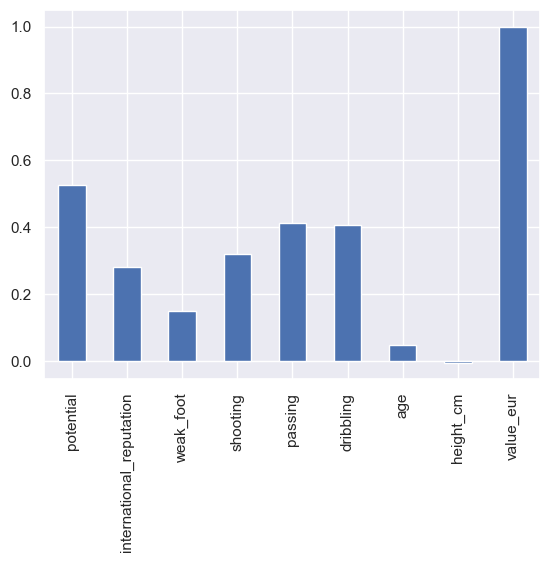

In [18]:
value_corr.loc[:,"value_eur"].plot.bar()

<AxesSubplot:>

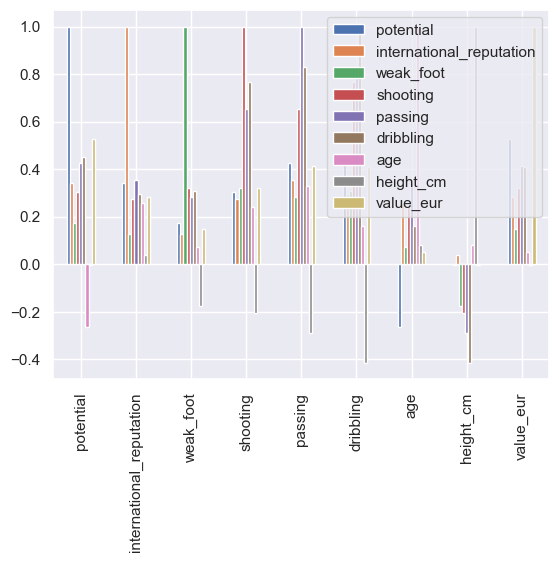

In [19]:
value_corr.plot.bar()

In [20]:
#standard deviation
samp.std()

C:\Users\Rajarathinam\AppData\Local\Temp\ipykernel_9876\2696707464.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  samp.std()


potential                    6.139669
international_reputation     0.378861
weak_foot                    0.664656
shooting                    14.029418
passing                     10.407844
dribbling                   10.284950
age                          4.656964
height_cm                    6.756961
dtype: float64

In [21]:
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [22]:
data["passing"].std()

10.407843962305282

In [23]:
data["passing"].skew()
#skew of passing is -0.2, so it symmerical skewed, therfore mean imputation is best

-0.23829895527818298

In [24]:
#mean imputation
data["passing"].fillna(int(data['passing'].mean()), inplace=True)

In [25]:
data["passing"].isnull().sum()

0

In [26]:
data['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

In [27]:
pos={"RW":"F",
     "LW":"F",
     "ST":"F",
     "CF":"F",
     'LS':'F',
     'RS':'F',
     'RF':'F',
     'LF':'F',
     'CAM':"M",
     'RCM':"M",
     'CDM':"M",
     'LDM':"M",
     'RM':"M",
     'LCM':"M",
     'LM':"M",
     'RDM':"M",
     'RAM':"M",
     'CM':"M",
     'LAM':"M",
     'LCB':'D',
     'RCB':'D',
     'CB':'D',
     'LB':'D',
     'RB':'D',
     'RWB':'D',
     'LWB':'D',
     'GK':'GK',
     }
len(pos)

27

In [28]:
#row no of team position having reserve
row_num_res = data[data['team_position'] == 'RES'].index
print(row_num_res)

Int64Index([   93,   201,   215,   252,   294,   358,   435,   458,   462,
              528,
            ...
            18251, 18254, 18255, 18256, 18258, 18259, 18260, 18261, 18263,
            18273],
           dtype='int64', length=2958)


In [29]:
for i in row_num_res:
	data['team_position'].iloc[i]= data['player_positions'].iloc[i].split(',')[0] 

C:\Users\Rajarathinam\AppData\Local\Temp\ipykernel_9876\1728170100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['team_position'].iloc[i]= data['player_positions'].iloc[i].split(',')[0]


In [30]:
data['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RAM',
       'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

In [31]:
#row no having sub as team position
row_num_sub = data[data['team_position'] == 'SUB'].index
print(row_num_sub)

Int64Index([   48,    53,    55,    59,    62,    70,    73,    79,    91,
               98,
            ...
            18267, 18268, 18269, 18270, 18271, 18272, 18274, 18275, 18276,
            18277],
           dtype='int64', length=7820)


In [32]:
len(row_num_sub)

7820

In [33]:
for i in row_num_sub:
	data['team_position'].iloc[i]= data['player_positions'].iloc[i].split(',')[0] 

C:\Users\Rajarathinam\AppData\Local\Temp\ipykernel_9876\3520346366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['team_position'].iloc[i]= data['player_positions'].iloc[i].split(',')[0]


In [34]:
data['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'LB', 'LS', 'CB', 'RB', 'RDM', 'RAM',
       'RS', 'RF', 'CM', 'LF', 'LAM', nan, 'RWB', 'LWB'], dtype=object)

In [35]:
data.shape

(18278, 104)

In [36]:
data['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'LB', 'LS', 'CB', 'RB', 'RDM', 'RAM',
       'RS', 'RF', 'CM', 'LF', 'LAM', nan, 'RWB', 'LWB'], dtype=object)

In [37]:
data=data.dropna(subset=['team_position'],how='all')

In [38]:
data.shape


(18038, 104)

In [39]:
data['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'LB', 'LS', 'CB', 'RB', 'RDM', 'RAM',
       'RS', 'RF', 'CM', 'LF', 'LAM', 'RWB', 'LWB'], dtype=object)

<AxesSubplot:xlabel='team_position', ylabel='Proportion'>

<Figure size 800x800 with 0 Axes>

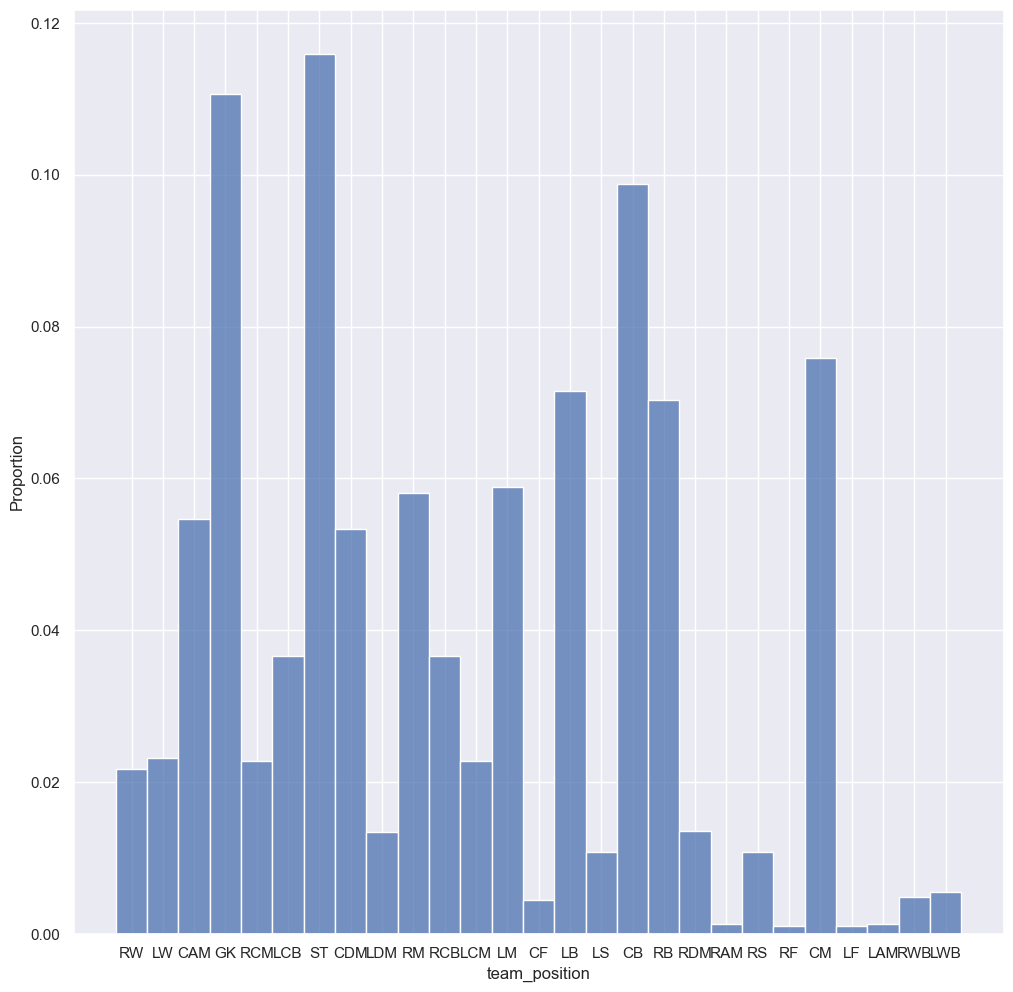

In [40]:
plt.figure(figsize=(8,8),edgecolor='blue')
plt.figure(figsize = (12, 12))
sns.histplot(data['team_position'],stat='proportion')

In [41]:
data['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'LB', 'LS', 'CB', 'RB', 'RDM', 'RAM',
       'RS', 'RF', 'CM', 'LF', 'LAM', 'RWB', 'LWB'], dtype=object)

In [42]:
type(data["team_position"].iloc[0])

str

In [43]:
s=set()
for i in range(len(data)):
	if len(data['team_position'].iloc[i])>1:
		s.add(data['team_position'].iloc[i])
s


{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST'}

In [44]:
#log transformation
# data['value_eur']=np.log(data['value_eur']+1)

# np.isinf(data['value_eur']).sum()



In [45]:
for i in range(len(data)):
	data['team_position'].iloc[i] = pos.get( data['team_position'].iloc[i] )

C:\Users\Rajarathinam\AppData\Local\Temp\ipykernel_9876\1212327578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['team_position'].iloc[i] = pos.get( data['team_position'].iloc[i] )


In [46]:
data['team_position'].unique()

array(['F', 'M', 'GK', 'D'], dtype=object)

<AxesSubplot:xlabel='team_position', ylabel='Proportion'>

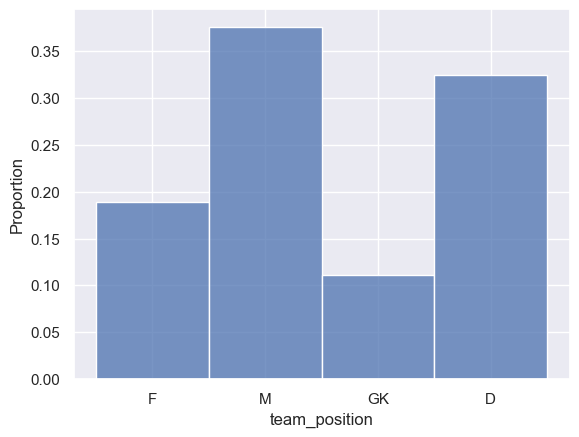

In [47]:
sns.histplot(data['team_position'],stat='proportion')

In [48]:
x = pd.DataFrame({"age":data["age"],"height":data["height_cm"],"potential":data["potential"],"reputation":data["international_reputation"],"weak_foot":data["weak_foot"],"team_position":data["team_position"],"passing":data["passing"]})
x_linear=pd.DataFrame({"potential":data["potential"]})

In [49]:

y = (data['value_eur'])

In [50]:
x['team_position']=x['team_position'].replace(['F','M','D','GK'],[1,2,3,4])

In [51]:

x = x.apply(pd.to_numeric, downcast='float')
x['passing'].isnull().sum()
x.isnull().sum()

age              0
height           0
potential        0
reputation       0
weak_foot        0
team_position    0
passing          0
dtype: int64

In [52]:
ds = x.isin([np.inf, -np.inf])
print(ds.sum())

age              0
height           0
potential        0
reputation       0
weak_foot        0
team_position    0
passing          0
dtype: int64


In [53]:
y=y.astype('float64')
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 18038 entries, 0 to 18277
Series name: value_eur
Non-Null Count  Dtype  
--------------  -----  
18038 non-null  float64
dtypes: float64(1)
memory usage: 281.8 KB


In [54]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

samp=data[["age","height_cm","potential"]]
# Fit model
model = ols('value_eur ~ age+potential+height_cm+weak_foot+team_position+passing+international_reputation', data=data).fit()

# Generate ANOVA table
#anova_results = anova_lm(model.summary())

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              value_eur   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2566.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        15:07:27   Log-Likelihood:            -2.9848e+05
No. Observations:               18038   AIC:                         5.970e+05
Df Residuals:                   18028   BIC:                         5.971e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [55]:
#Model

In [56]:
#from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 3)
x_ltrain,x_ltest,y_ltrain,y_ltest=train_test_split(x_linear,y,test_size=0.2,random_state=3)

In [57]:
x.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18038 entries, 0 to 18277
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            18038 non-null  float32
 1   height         18038 non-null  float32
 2   potential      18038 non-null  float32
 3   reputation     18038 non-null  float32
 4   weak_foot      18038 non-null  float32
 5   team_position  18038 non-null  float32
 6   passing        18038 non-null  float32
dtypes: float32(7)
memory usage: 634.1 KB


In [58]:
r2score={}
rmse={}
mae={}

In [59]:
#scaler.fit(x_train)

In [60]:
#x_train_standardized=scaler.transform(x_train)

In [61]:
# x_test_standardized=scaler.transform(x_test)

In [62]:
# x_train_standardized=pd.DataFrame(x_train_standardized,columns=x_train.columns)
# x_test_standardized=pd.DataFrame(x_test_standardized,columns=x_test.columns)


In [68]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_ltrain,y_ltrain)
y_lpred=LR.predict(x_ltest)
print( r2_score(y_ltest,y_lpred))
print( np.sqrt(mean_squared_error(y_ltest,y_lpred)) )
print( mean_absolute_error(y_ltest, y_lpred))
r2score.update({"Linear regeression": r2_score(y_ltest,y_lpred)})
rmse.update({"Linear regeression":np.sqrt(mean_squared_error(y_ltest,y_lpred))})
mae.update({"Linear regeression":mean_absolute_error(y_ltest, y_lpred)})

0.3526935399275173
4400141.888640225
2339659.797256225


In [64]:
#multiple
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [65]:
LR.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred = LR.predict(x_test)


In [67]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
e=2.718281828459045
print(r2_score(y_test,y_pred))
print( np.sqrt(mean_squared_error(y_test,y_pred)) )
print( mean_absolute_error(y_test, y_pred))
r2score.update({"Multiple regeression":r2_score(y_test,y_pred)})
rmse.update({"Multiple regeression":np.sqrt(mean_squared_error(y_test,y_pred))})
mae.update({"Multiple regeression":mean_absolute_error(y_test, y_pred)})

0.5527803717375723
3657397.28902474
1917119.8492239467


In [69]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
e=2.718281828459045
print(r2_score(y_test,y_pred))
print( np.sqrt(mean_squared_error(y_test,y_pred)) )
print( mean_absolute_error(y_test,y_pred) )
r2score.update({"Decision tree":r2_score(y_test,y_pred)})
rmse.update({"Decision tree":np.sqrt(mean_squared_error(y_test,y_pred))})
mae.update({"Decision tree":mean_absolute_error(y_test, y_pred)})

0.8934664607438871
1785068.507665377
533496.1659275683


In [71]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor()

In [72]:
randomforest.fit(x_train,y_train)


RandomForestRegressor()

In [73]:
y_pred=randomforest.predict(x_test)

In [74]:
e=2.718281828459045
print(r2_score(y_test,y_pred))
print( np.sqrt(mean_squared_error(y_test,y_pred)) )
print( mean_absolute_error(y_test,y_pred) )
print(randomforest.score(x_train, y_train))
r2score.update({"Random forest":r2_score(y_test,y_pred)})
rmse.update({"Random forest":np.sqrt(mean_squared_error(y_test,y_pred))})
mae.update({"Random forest":mean_absolute_error(y_test, y_pred)})

0.9626500769536795
1056955.1670146554
392839.136002886
0.9929968542674039


In [75]:
r2score

{'Multiple regeression': 0.5527803717375723,
 'Linear regeression': 0.3526935399275173,
 'Decision tree': 0.8934664607438871,
 'Random forest': 0.9626500769536795}

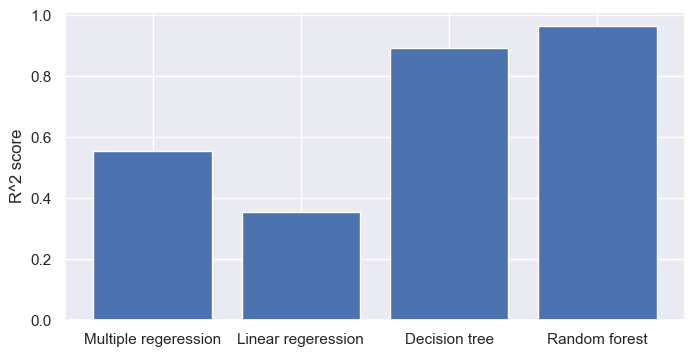

In [76]:
ind = np.arange(len(r2score))

plt.figure(figsize = (8, 4))
plt.bar(ind, list(r2score.values()))
plt.xticks(ind, list(r2score.keys()))
plt.ylabel("R^2 score")
plt.show()

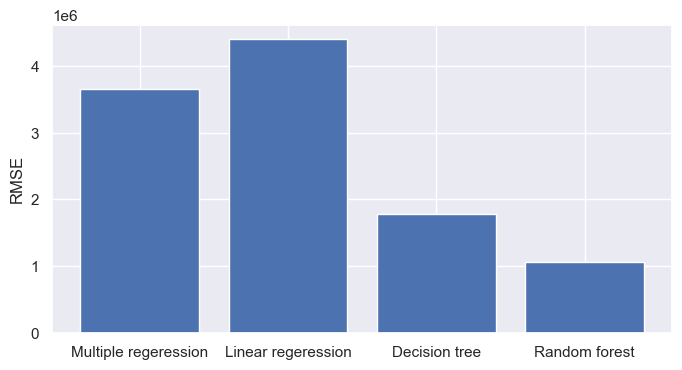

In [77]:
ind = np.arange(len(rmse))

plt.figure(figsize = (8, 4))
plt.bar(ind, list(rmse.values()))
plt.xticks(ind, list(rmse.keys()))
plt.ylabel("RMSE")

plt.show()

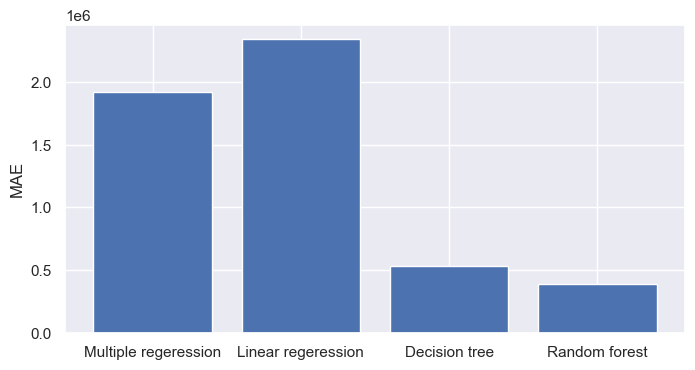

In [78]:
ind = np.arange(len(mae))

plt.figure(figsize = (8, 4))
plt.bar(ind, list(mae.values()))
plt.xticks(ind, list(mae.keys()))
plt.ylabel("MAE")

plt.show()

In [79]:
test1 = pd.DataFrame([{"age":32,"height":170,"potential":94,"reputation":5,"weak_foot":4,"team_position":1,"passing":92.0}])
test2 = pd.DataFrame([{"age":28,"height":175,"potential":91,"reputation":4,"weak_foot":4,"team_position":1,"passing":86.0}])


In [80]:
y_pred=randomforest.predict(test1)

In [81]:
print(y_pred)

[90680000.]


In [82]:
95500000
92405000

92405000

In [83]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",F,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",F,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",M,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,57.0,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",F,7.0,NaN,2019-07-01,2024

In [84]:
import pickle 
pickle.dump(randomforest,open('model.pkl','wb'))

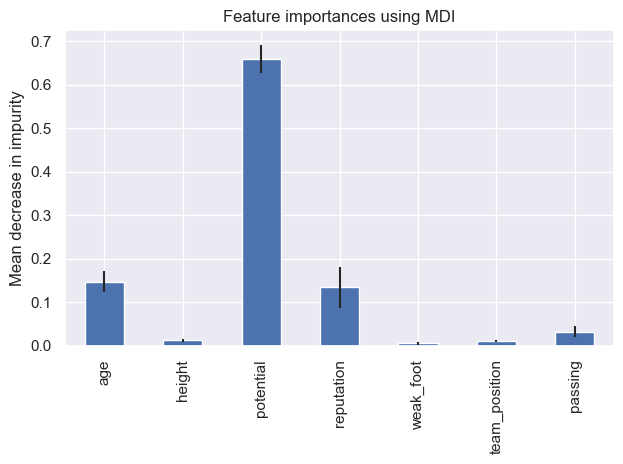

In [86]:
feature_names = [f"{i}" for i in (x)]
importances = randomforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomforest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


Feature: 0, Score: 0.14707
Feature: 1, Score: 0.01297
Feature: 2, Score: 0.65855
Feature: 3, Score: 0.13405
Feature: 4, Score: 0.00545
Feature: 5, Score: 0.00995
Feature: 6, Score: 0.03195


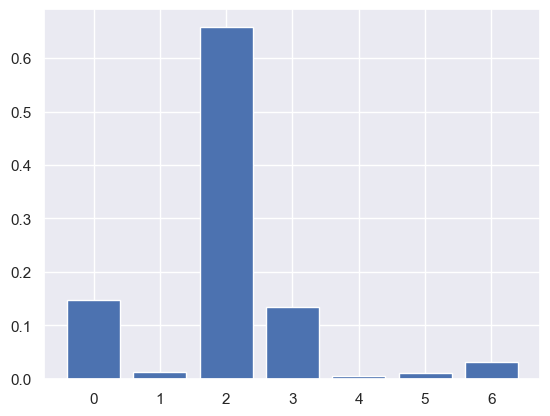

Feature 0:age	Feature 1:height	Feature 2:potential	Feature 3:internationalreputation	Feature 4:weak foot	Feature 6: position	Feature 7: passing	


In [87]:
from matplotlib import pyplot
importance = randomforest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
print("Feature 0:age\t"+"Feature 1:height\t"+"Feature 2:potential\t"+"Feature 3:internationalreputation\t"+"Feature 4:weak foot\t"+"Feature 6: position\t"+"Feature 7: passing\t")


Feature: 0, Score: 0.13567
Feature: 1, Score: 0.01534
Feature: 2, Score: 0.63426
Feature: 3, Score: 0.17083
Feature: 4, Score: 0.00281
Feature: 5, Score: 0.01170
Feature: 6, Score: 0.02938


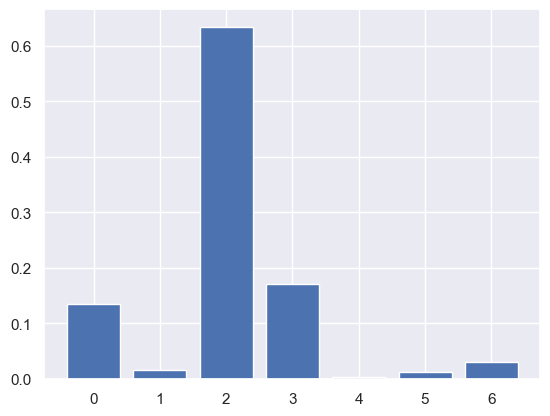

In [88]:
from matplotlib import pyplot
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [89]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",F,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",F,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",M,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,57.0,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",F,7.0,NaN,2019-07-01,2024

In [90]:
feature=data[["weight_kg","overall","preferred_foot","skill_moves",]]

In [91]:
feature['preferred_foot']=feature['preferred_foot'].replace(['Left','Right'],[1,2])
feature

C:\Users\Rajarathinam\AppData\Local\Temp\ipykernel_9876\579949896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['preferred_foot']=feature['preferred_foot'].replace(['Left','Right'],[1,2])


,weight_kg,overall,preferred_foot,skill_moves
0,72,94,1,4
1,83,93,2,5
2,68,92,2,5
3,87,91,2,1
4,74,91,2,4
...,...,...,...,...
18273,79,48,2,2
18274,66,48,2,2
18275,75,48,2,2
18276,74,48,2,2


In [92]:
final=pd.concat([feature,x],axis=1)
final

,weight_kg,overall,preferred_foot,skill_moves,age,height,potential,reputation,weak_foot,team_position,passing
0,72,94,1,4,32.0,170.0,94.0,5.0,4.0,1.0,92.0
1,83,93,2,5,34.0,187.0,93.0,5.0,4.0,1.0,82.0
2,68,92,2,5,27.0,175.0,92.0,5.0,5.0,2.0,87.0
3,87,91,2,1,26.0,188.0,93.0,3.0,3.0,4.0,57.0
4,74,91,2,4,28.0,175.0,91.0,4.0,4.0,1.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...
18273,79,48,2,2,22.0,186.0,56.0,1.0,3.0,3.0,28.0
18274,66,48,2,2,22.0,177.0,56.0,1.0,2.0,3.0,33.0
18275,75,48,2,2,19.0,186.0,56.0,1.0,2.0,2.0,44.0
18276,74,48,2,2,18.0,185.0,54.0,1.0,2.0,2.0,47.0


In [93]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(final, y)
mutual_info

array([0.00703977, 1.48597674, 0.00331064, 0.17994717, 0.31841055,
       0.        , 0.89478349, 0.10464128, 0.03715628, 0.04170284,
       0.32951822])

In [94]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = final.columns
mutual_info.sort_values(ascending=False)

overall           1.485977
potential         0.894783
passing           0.329518
age               0.318411
skill_moves       0.179947
reputation        0.104641
team_position     0.041703
weak_foot         0.037156
weight_kg         0.007040
preferred_foot    0.003311
height            0.000000
dtype: float64

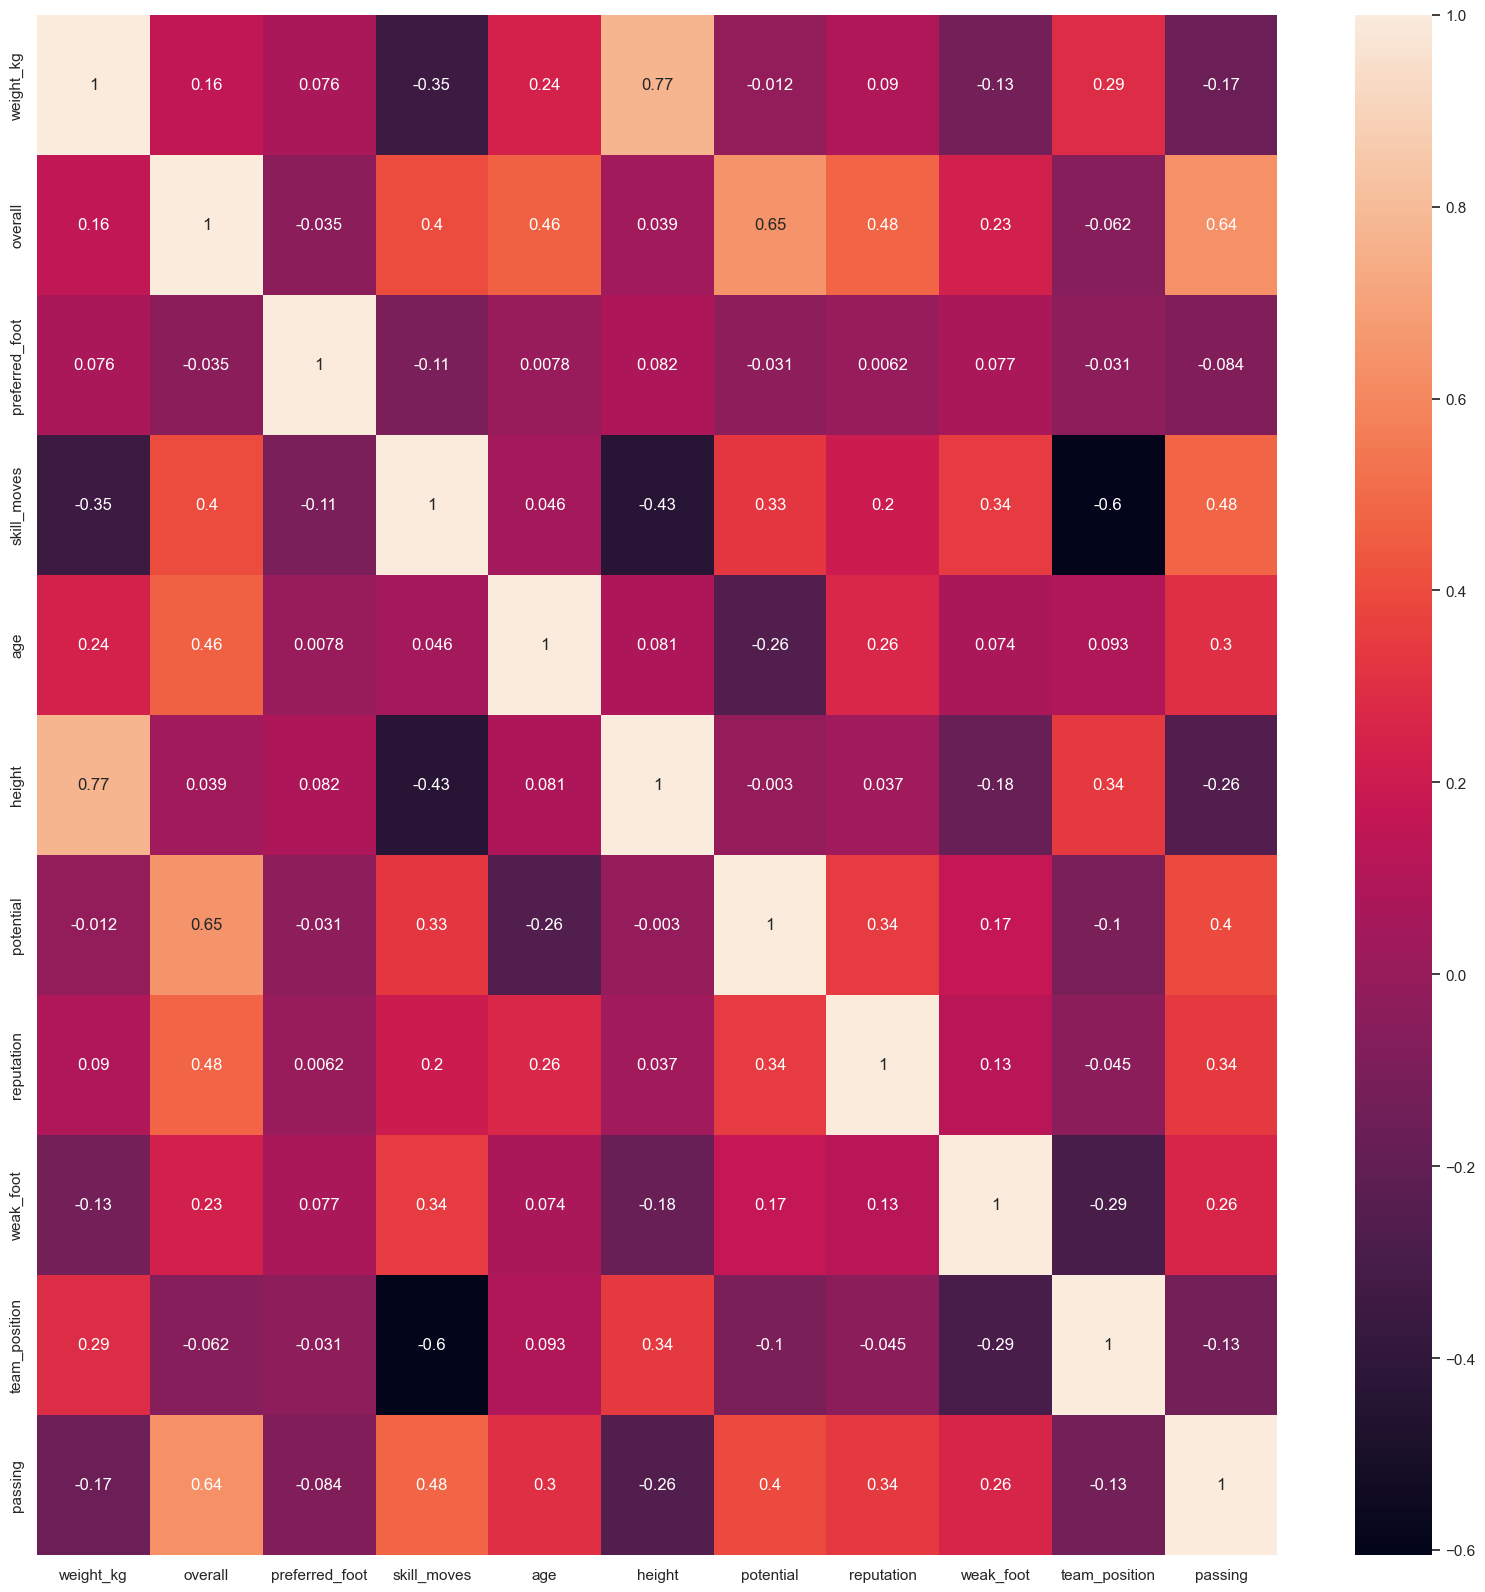

In [95]:
fig, ax = plt.subplots(1, figsize=(20, 20))
a=sns.heatmap(final.corr(),annot=True)

In [96]:
age height
preferred height
preferred repuation

SyntaxError: invalid syntax (288117055.py, line 1)